In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/main/data/clean/merged_financials.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


Shape: (10503, 330)


/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_13640/4289885866.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,21,22,24,25,26,27,28,29,32,33,34,35,36,37,38,40,41,45,46,47,48,50,51,52,53,54,57,59,60,61,63,64,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,137,141,147,156,173,199,200,201,202,203,204,205,206,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,265,266,267,268,269,270,271,272,273,274,275,276,278,279,280,281,282,285,286,288,289,290,291,292,293,296,297,298,299,300,301,302,304,305,309,310,311,312,314,315,316,317,318,321,323,324,325,327,328) have mixed types. Specify dtype option on import or set low_memory=Fa

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56.4,Attr57.4,Attr58.4,Attr59.4,Attr60.4,Attr61.4,Attr62.4,Attr63.4,Attr64.4,class.4
0,1.0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
1,2.0,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,...,-0.028591,-0.012035,1.00470,0.15222,6.0911,3.2749,111.140,3.2841,3.37,0.0
2,3.0,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,...,0.123960,0.19229,0.87604,0.0,8.7934,2.987,71.531,5.1027,5.6188,0.0
3,4.0,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,...,0.418840,-0.79602,0.59074,2.8787,7.6524,3.3302,147.560,2.4735,5.9299,0.0
4,5.0,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0.0


In [6]:
df.columns


Index(['id', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9',
       ...
       'Attr56.4', 'Attr57.4', 'Attr58.4', 'Attr59.4', 'Attr60.4', 'Attr61.4',
       'Attr62.4', 'Attr63.4', 'Attr64.4', 'class.4'],
      dtype='object', length=330)

In [3]:
for i, col in enumerate(df.columns):
    print(i, col)

0 id
1 Attr1
2 Attr2
3 Attr3
4 Attr4
5 Attr5
6 Attr6
7 Attr7
8 Attr8
9 Attr9
10 Attr10
11 Attr11
12 Attr12
13 Attr13
14 Attr14
15 Attr15
16 Attr16
17 Attr17
18 Attr18
19 Attr19
20 Attr20
21 Attr21
22 Attr22
23 Attr23
24 Attr24
25 Attr25
26 Attr26
27 Attr27
28 Attr28
29 Attr29
30 Attr30
31 Attr31
32 Attr32
33 Attr33
34 Attr34
35 Attr35
36 Attr36
37 Attr37
38 Attr38
39 Attr39
40 Attr40
41 Attr41
42 Attr42
43 Attr43
44 Attr44
45 Attr45
46 Attr46
47 Attr47
48 Attr48
49 Attr49
50 Attr50
51 Attr51
52 Attr52
53 Attr53
54 Attr54
55 Attr55
56 Attr56
57 Attr57
58 Attr58
59 Attr59
60 Attr60
61 Attr61
62 Attr62
63 Attr63
64 Attr64
65 class
66 id.1
67 Attr1.1
68 Attr2.1
69 Attr3.1
70 Attr4.1
71 Attr5.1
72 Attr6.1
73 Attr7.1
74 Attr8.1
75 Attr9.1
76 Attr10.1
77 Attr11.1
78 Attr12.1
79 Attr13.1
80 Attr14.1
81 Attr15.1
82 Attr16.1
83 Attr17.1
84 Attr18.1
85 Attr19.1
86 Attr20.1
87 Attr21.1
88 Attr22.1
89 Attr23.1
90 Attr24.1
91 Attr25.1
92 Attr26.1
93 Attr27.1
94 Attr28.1
95 Attr29.1
96 Attr30.1
97 At

In [7]:
# Clean data
def extract_year(df, year):
    """
    year = 1 → Attr1 .. Attr64, class
    year = 2 → Attr1.1 .. Attr64.1, class.1
    year = 3 → Attr1.2 .. Attr64.2, class.2
    year = 4 → Attr1.3 .. Attr64.3, class.3
    year = 5 → Attr1.4 .. Attr64.4, class.4
    """

    suffix = "" if year == 1 else f".{year-1}"
    target_col = "class" if year == 1 else f"class.{year-1}"

    # feature columns
    feature_cols = [f"Attr{i}{suffix}" for i in range(1, 65)]

    # extract
    df_year = df[feature_cols + [target_col]].copy()

    # replace ? with NaN
    df_year = df_year.replace("?", np.nan)

    # convert to numeric
    for col in feature_cols:
        df_year[col] = pd.to_numeric(df_year[col], errors="coerce")

    # convert target
    df_year[target_col] = pd.to_numeric(df_year[target_col], errors="coerce").astype("Int64")

    # drop rows with missing values
    df_year = df_year.dropna()

    return df_year, feature_cols, target_col




In [9]:
# Print the amount of clean data
year_data = {}
for year in range(1, 6):
    df_year, feat_cols, tgt_col = extract_year(df, year)
    year_data[year] = df_year
    print(f"Year {year}:", df_year.shape)


Year 1: (3194, 65)
Year 2: (4088, 65)
Year 3: (4885, 65)
Year 4: (4769, 65)
Year 5: (3031, 65)


In [23]:
for year, df_year in year_data.items():
    # find target column for this year
    if year == 1:
        target_col = "class"
    else:
        target_col = f"class.{year-1}"

    # rename target column to "bankrupt"
    df_year = df_year.rename(columns={target_col: "bankrupt"})

    # save back into dictionary
    year_data[year] = df_year



The bankrupt column needs some explanation

It is 1 if the company goes bankrupt within the forecast horizon.

So if bankrupt.3  =1 , the company goes bankrupt within 2 years


In [24]:
# Store the data for each year sepperately
for year, df_year in year_data.items():
    df_year.to_csv(f"polish_bankruptcy_year{year}.csv", index=False)

In [25]:
# Verify the data, and see if its shows the expected amount of columns
for year in range(1,6):
    df_year = pd.read_csv(f"polish_bankruptcy_year{year}.csv")
    print(f"\n=== YEAR {year} ===")
    print("Shape:", df_year.shape)
    print(df_year.dtypes.tail())  
    print(df_year['bankrupt'].value_counts())
    print(df_year['bankrupt'].value_counts(normalize=True))


=== YEAR 1 ===
Shape: (3194, 65)
Attr61      float64
Attr62      float64
Attr63      float64
Attr64      float64
bankrupt      int64
dtype: object
bankrupt
0    3164
1      30
Name: count, dtype: int64
bankrupt
0    0.990607
1    0.009393
Name: proportion, dtype: float64

=== YEAR 2 ===
Shape: (4088, 65)
Attr61.1    float64
Attr62.1    float64
Attr63.1    float64
Attr64.1    float64
bankrupt      int64
dtype: object
bankrupt
0    4015
1      73
Name: count, dtype: int64
bankrupt
0    0.982143
1    0.017857
Name: proportion, dtype: float64

=== YEAR 3 ===
Shape: (4885, 65)
Attr61.2    float64
Attr62.2    float64
Attr63.2    float64
Attr64.2    float64
bankrupt      int64
dtype: object
bankrupt
0    4778
1     107
Name: count, dtype: int64
bankrupt
0    0.978096
1    0.021904
Name: proportion, dtype: float64

=== YEAR 4 ===
Shape: (4769, 65)
Attr61.3    float64
Attr62.3    float64
Attr63.3    float64
Attr64.3    float64
bankrupt      int64
dtype: object
bankrupt
0    4649
1     120
Name

In [26]:
ratio_names = {
    1: "net_profit_to_total_assets",
    2: "total_liabilities_to_total_assets",
    3: "working_capital_to_total_assets",
    4: "current_assets_to_shortterm_liabilities",
    5: "cash_flow_to_operating_expenses",
    6: "retained_earnings_to_total_assets",
    7: "ebit_to_total_assets",
    8: "equity_to_total_liabilities",
    9: "sales_to_total_assets",
    10: "equity_to_total_assets",
    11: "gross_profit_plus_other_to_total_assets",
    12: "gross_profit_to_shortterm_liabilities",
    13: "gross_profit_plus_dep_to_sales",
    14: "gross_profit_plus_interest_to_total_assets",
    15: "liabilities_to_gross_profit_dep",
    16: "gross_profit_dep_to_total_liabilities",
    17: "total_assets_to_total_liabilities",
    18: "gross_profit_to_total_assets",
    19: "gross_profit_to_sales",
    20: "inventory_to_sales_days",
    21: "sales_growth",
    22: "operating_profit_to_total_assets",
    23: "net_profit_to_sales",
    24: "gross_profit_3yr_to_total_assets",
    25: "equity_minus_capital_to_total_assets",
    26: "net_profit_dep_to_total_liabilities",
    27: "operating_profit_to_financial_expenses",
    28: "working_capital_to_fixed_assets",
    29: "log_total_assets",
    30: "liabilities_minus_cash_to_sales",
    31: "gross_profit_plus_interest_to_sales",
    32: "current_liabilities_to_cogs_days",
    33: "operating_expenses_to_shortterm_liabilities",
    34: "operating_expenses_to_total_liabilities",
    35: "profit_on_sales_to_total_assets",
    36: "total_sales_to_total_assets",
    37: "current_assets_minus_inventory_to_longterm_liabilities",
    38: "constant_capital_to_total_assets",
    39: "profit_on_sales_to_sales",
    40: "current_assets_minus_inventory_receivables_to_shortterm_liabilities",
    41: "liabilities_to_operating_profit_dep",
    42: "operating_profit_to_sales",
    43: "receivables_inventory_turnover_days",
    44: "receivables_to_sales_days",
    45: "net_profit_to_inventory",
    46: "current_assets_minus_inventory_to_shortterm_liabilities",
    47: "inventory_to_cogs_days",
    48: "ebitda_to_total_assets",
    49: "ebitda_to_sales",
    50: "current_assets_to_total_liabilities",
    51: "shortterm_liabilities_to_total_assets",
    52: "shortterm_liabilities_to_cogs_days",
    53: "equity_to_fixed_assets",
    54: "constant_capital_to_fixed_assets",
    55: "working_capital",
    56: "sales_minus_cogs_to_sales",
    57: "current_minus_inventory_minus_stli_to_salesminusprofitminusdep",
    58: "total_costs_to_total_sales",
    59: "longterm_liabilities_to_equity",
    60: "sales_to_inventory",
    61: "sales_to_receivables",
    62: "shortterm_liabilities_to_sales_days",
    63: "sales_to_shortterm_liabilities",
    64: "sales_to_fixed_assets"
}


In [28]:
#Rename each column based on the labels provided on the site of the data
for year in range(1, 6):
    df = pd.read_csv(f"polish_bankruptcy_year{year}.csv")
    
    rename_dict = {}

    for i in range(1, 65):
        old_name = f"Attr{i}" if year == 1 else f"Attr{i}.{year-1}"
        new_name = ratio_names[i]
        rename_dict[old_name] = new_name

    df = df.rename(columns=rename_dict)

    # Save back
    df.to_csv(f"polish_bankruptcy_year{year}.csv", index=False)


In [29]:
df = pd.read_csv("polish_bankruptcy_year5.csv")
df.columns

Index(['net_profit_to_total_assets', 'total_liabilities_to_total_assets',
       'working_capital_to_total_assets',
       'current_assets_to_shortterm_liabilities',
       'cash_flow_to_operating_expenses', 'retained_earnings_to_total_assets',
       'ebit_to_total_assets', 'equity_to_total_liabilities',
       'sales_to_total_assets', 'equity_to_total_assets',
       'gross_profit_plus_other_to_total_assets',
       'gross_profit_to_shortterm_liabilities',
       'gross_profit_plus_dep_to_sales',
       'gross_profit_plus_interest_to_total_assets',
       'liabilities_to_gross_profit_dep',
       'gross_profit_dep_to_total_liabilities',
       'total_assets_to_total_liabilities', 'gross_profit_to_total_assets',
       'gross_profit_to_sales', 'inventory_to_sales_days', 'sales_growth',
       'operating_profit_to_total_assets', 'net_profit_to_sales',
       'gross_profit_3yr_to_total_assets',
       'equity_minus_capital_to_total_assets',
       'net_profit_dep_to_total_liabilities',


In [34]:
# check data for missing values:
for year in range(1, 6):
    print(f"year: {year}")
    
    df = pd.read_csv(f"polish_bankruptcy_year{year}.csv")
    print("Missing values:", df.isna().sum().sum())

year: 1
Missing values: 0
year: 2
Missing values: 0
year: 3
Missing values: 0
year: 4
Missing values: 0
year: 5
Missing values: 0


In [38]:
# Show some descriptive statistic of each of the years
for year in range(1, 6):
    print(f"Descriptive Stats of Year: {year}")
    
    df = pd.read_csv(f"polish_bankruptcy_year{year}.csv")
    
    display(df.describe())  

Descriptive Stats of Year: 1


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,0.082358,0.535249,0.141406,1.821638,192.176831,0.079521,0.098013,1.447578,1.494258,0.438608,...,0.082960,0.182751,0.919213,0.356691,26.103751,10.244350,94.690059,6.125517,7.101457,0.009393
std,0.117596,0.243032,0.223503,1.730182,17706.111018,0.703616,0.129814,2.831591,1.530632,0.241160,...,0.128707,0.602643,0.129759,5.591756,113.118162,29.392525,121.570287,7.326844,23.212027,0.096474
min,-1.153300,0.008590,-1.956800,0.140660,-80419.000000,-37.292000,-1.142400,-0.730560,0.110090,-1.943200,...,-1.394300,-10.412000,-0.001436,-256.990000,0.485190,0.223610,1.510500,0.071822,0.035071,0.000000
25%,0.019102,0.366192,0.007572,1.016350,-53.052750,0.000000,0.023862,0.425897,1.023925,0.290447,...,0.018412,0.050022,0.885060,0.046910,5.784475,4.875625,51.357000,3.238175,2.210575,0.000000
50%,0.065399,0.523925,0.138690,1.379200,-15.286500,0.022212,0.078067,0.865525,1.106750,0.449590,...,0.055393,0.154050,0.945695,0.171125,9.177550,6.939850,76.800000,4.752600,3.717850,0.000000
75%,0.126595,0.687998,0.279392,2.014475,18.891250,0.189560,0.151015,1.660175,1.629025,0.604062,...,0.118277,0.304005,0.983800,0.490292,17.489750,10.216750,112.715000,7.107100,6.496350,0.000000
max,1.539900,2.700500,0.859110,25.822000,990900.000000,2.024300,1.539900,115.190000,71.555000,0.989420,...,0.993970,15.640000,2.394300,39.365000,3337.800000,1451.500000,5082.000000,241.640000,726.980000,1.000000


Descriptive Stats of Year: 2


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,...,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,0.045834,0.555819,0.122524,1.844112,-14.839791,0.070933,0.056665,1.408161,1.490007,0.420250,...,-2.053515,0.134707,3.064559,0.671483,39.096238,10.475138,201.421826,6.056507,7.711616,0.017857
std,0.142841,0.268104,0.243545,2.065904,1848.968396,0.248438,0.153027,2.346378,0.912949,0.266290,...,133.503647,4.784606,133.522250,13.809685,337.714261,23.799480,3720.615320,6.827192,36.149070,0.132448
min,-1.251400,0.012177,-2.362500,0.075935,-44715.000000,-2.719600,-1.278900,-0.683070,0.000690,-2.155300,...,-8534.600000,-96.326000,-1.046300,-189.580000,0.005144,0.002003,1.876000,0.001915,0.000561,0.000000
25%,0.000000,0.369013,-0.017390,0.965788,-59.575000,0.000000,0.000829,0.367060,1.016100,0.260885,...,0.013174,0.004399,0.892877,0.045461,5.610050,4.855850,51.273500,3.011950,2.020175,0.000000
50%,0.038250,0.547440,0.120280,1.328900,-16.441500,0.000000,0.046603,0.782965,1.109450,0.429455,...,0.052833,0.107585,0.954300,0.191060,9.514450,6.935200,80.922500,4.510500,3.432250,0.000000
75%,0.108145,0.715618,0.271103,2.010275,22.346250,0.154292,0.127510,1.638025,1.684775,0.604010,...,0.115710,0.257687,0.993110,0.565218,18.531000,10.511250,121.185000,7.118650,6.161825,0.000000
max,1.492000,3.155300,0.922250,43.119000,50836.000000,2.100600,1.492000,80.671000,11.172000,0.982340,...,2.002300,147.190000,8536.800000,751.000000,13198.000000,871.420000,190570.000000,194.570000,1379.600000,1.000000


Descriptive Stats of Year: 3


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
count,4885.000000,4885.000000,4885.000000,4885.000000,4.885000e+03,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,...,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,0.044867,0.558714,0.128118,2.208229,-2.643620e+03,0.032291,0.054911,1.511439,1.454864,0.422976,...,-1.108096,-0.256229,2.113939,2.996615,81.503335,10.868437,142.439704,6.377524,11.844133,0.021904
std,0.151866,0.333430,0.273156,8.544675,1.728161e+05,0.385487,0.156803,2.487303,0.959180,0.368859,...,81.436048,25.549387,81.450102,113.224819,1940.300222,24.807476,1664.695851,11.990796,262.373771,0.146384
min,-1.936100,0.013866,-2.850900,0.019163,-1.190300e+07,-9.255600,-1.936100,-1.025300,0.001250,-7.442800,...,-5691.700000,-1667.300000,-0.425840,-142.790000,0.003985,0.005415,0.717960,0.000000,0.000000,0.000000
25%,0.002741,0.353920,-0.009095,0.977130,-6.268900e+01,0.000000,0.004415,0.385080,1.006600,0.272980,...,0.009390,0.008578,0.893960,0.045656,5.546200,4.692300,50.970000,2.946700,1.723400,0.000000
50%,0.038919,0.530990,0.129530,1.388900,-1.292700e+01,0.000000,0.046391,0.842340,1.103600,0.445200,...,0.049890,0.102280,0.956390,0.190610,9.549300,6.815800,80.453000,4.536200,3.075600,0.000000
75%,0.104540,0.710480,0.292690,2.185600,2.789000e+01,0.123570,0.121550,1.739900,1.641600,0.618020,...,0.115250,0.248460,0.994240,0.580000,19.009000,10.355000,123.860000,7.136900,5.764500,0.000000
max,3.115500,8.442800,0.993960,508.860000,6.854400e+05,4.550100,2.319800,70.415000,11.322000,11.837000,...,0.999980,527.220000,5693.700000,7617.300000,125170.000000,774.800000,111340.000000,508.380000,17902.000000,1.000000


Descriptive Stats of Year: 4


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,...,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4.769000e+03,4769.000000,4769.000000,4769.000000
mean,0.039607,0.561742,0.135051,1.998488,-73.235345,0.035517,0.050016,1.431612,1.403132,0.416746,...,0.011627,-0.188488,1.006507,1.720986,51.169451,9.609049,4.407010e+02,5.650566,12.892713,0.025163
std,0.166980,0.328759,0.266153,3.030037,3993.622099,4.135932,0.167384,2.143618,0.873191,0.326088,...,1.874421,11.803422,2.835117,37.444668,700.480155,20.637409,1.913672e+04,5.561920,291.671200,0.156635
min,-5.965500,0.022893,-3.000000,0.021061,-139260.000000,-117.420000,-5.965500,-0.850340,0.000469,-5.681800,...,-121.000000,-597.420000,-0.086331,-284.380000,0.038646,0.000494,1.135000e+00,0.000000,0.000000,0.000000
25%,0.003909,0.363710,-0.000300,0.998170,-61.148000,-0.000672,0.005474,0.380860,1.003700,0.270980,...,0.007656,0.013217,0.902160,0.039842,5.351200,4.472300,5.439600e+01,2.858900,1.727400,0.000000
50%,0.037021,0.531660,0.136200,1.403500,-13.349000,0.000000,0.044060,0.839900,1.089000,0.442800,...,0.042648,0.097389,0.962090,0.175660,9.031600,6.364900,8.536200e+01,4.273400,3.116600,0.000000
75%,0.093653,0.712000,0.292640,2.141200,27.245000,0.103720,0.109130,1.664800,1.575900,0.610420,...,0.102660,0.223340,0.994460,0.538470,17.289000,9.671500,1.274900e+02,6.706600,5.704000,0.000000
max,1.842200,6.681800,0.986400,115.780000,155870.000000,244.310000,1.842200,42.189000,10.829000,1.577000,...,0.999260,52.735000,187.000000,1661.000000,35590.000000,900.500000,1.301600e+06,108.420000,18820.000000,1.000000


Descriptive Stats of Year: 5


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,...,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,0.077612,0.395563,0.158949,2.110861,-25.282473,0.185764,-0.111717,1.520190,1.379944,0.550120,...,0.072569,0.133647,0.948785,0.348131,49.313981,8.777473,105.551362,5.551093,8.920625,0.033652
std,1.592255,7.842248,0.268428,6.129658,1537.757122,10.209500,9.401372,2.162341,1.374397,6.172781,...,0.175408,2.512309,0.469555,5.638059,694.055080,23.973412,143.126202,4.990974,93.805559,0.180362
min,-1.373200,-430.870000,-6.459000,0.028121,-69473.000000,-100.380000,-517.480000,-0.883070,0.002753,-7.552500,...,-3.339900,-40.399000,-0.164390,-184.980000,0.162570,0.036902,1.395700,0.000000,0.000000,0.000000
25%,0.005473,0.347875,0.026780,1.058850,-50.651500,0.000000,0.007302,0.436530,1.013100,0.297530,...,0.017604,0.017194,0.891605,0.032873,5.283500,4.422250,54.059000,2.990900,1.867400,0.000000
50%,0.041715,0.512730,0.160150,1.476000,-11.472000,0.000000,0.050217,0.889920,1.093100,0.457390,...,0.053224,0.106060,0.952100,0.157950,8.808500,6.198600,83.294000,4.376100,3.231600,0.000000
75%,0.097517,0.683045,0.311710,2.242450,24.869000,0.136360,0.114725,1.776350,1.522050,0.623495,...,0.114475,0.223140,0.987805,0.470035,15.864500,8.989600,122.035000,6.743100,5.772750,0.000000
max,87.459000,8.552500,0.991860,318.820000,34259.000000,543.250000,0.707530,29.769000,65.607000,339.850000,...,0.999640,87.981000,19.907000,82.390000,24742.000000,1150.200000,5416.200000,117.300000,4744.000000,1.000000


There appear to be some outliers, so the data needs to be winsorized first.

In [68]:
"""
def winsorize_df(df, lower=0.01, upper=0.99):
    df_clean = df.copy()

    # Identify ratio columns (exclude id + bankrupt)
    feature_cols = [c for c in df.columns if c not in ["id", "bankrupt"]]

    # Compute quantile bounds (Series)
    lower_bounds = df_clean[feature_cols].quantile(lower)
    upper_bounds = df_clean[feature_cols].quantile(upper)

    # Use pandas DataFrame.clip (supports Series bounds)
    df_clean[feature_cols] = df_clean[feature_cols].clip(
        lower=lower_bounds,
        upper=upper_bounds,
        axis=1   # important fix
    )

    return df_clean
"""

'\ndef winsorize_df(df, lower=0.01, upper=0.99):\n    df_clean = df.copy()\n\n    # Identify ratio columns (exclude id + bankrupt)\n    feature_cols = [c for c in df.columns if c not in ["id", "bankrupt"]]\n\n    # Compute quantile bounds (Series)\n    lower_bounds = df_clean[feature_cols].quantile(lower)\n    upper_bounds = df_clean[feature_cols].quantile(upper)\n\n    # Use pandas DataFrame.clip (supports Series bounds)\n    df_clean[feature_cols] = df_clean[feature_cols].clip(\n        lower=lower_bounds,\n        upper=upper_bounds,\n        axis=1   # important fix\n    )\n\n    return df_clean\n'

In [69]:
"""
winsorized_data = {}

for year in range(1, 6):
    print(f" Winsorizing year {year} ...")
    
    df_year = year_data[year]
    df_clean = winsorize_df(df_year)

    winsorized_data[year] = df_clean
    
    print("   Outlier max before:", df_year.iloc[:, 1:-1].max().max())
    print("   Outlier max after:",  df_clean.iloc[:, 1:-1].max().max())

year_data = winsorized_data
"""

'\nwinsorized_data = {}\n\nfor year in range(1, 6):\n    print(f" Winsorizing year {year} ...")\n\n    df_year = year_data[year]\n    df_clean = winsorize_df(df_year)\n\n    winsorized_data[year] = df_clean\n\n    print("   Outlier max before:", df_year.iloc[:, 1:-1].max().max())\n    print("   Outlier max after:",  df_clean.iloc[:, 1:-1].max().max())\n\nyear_data = winsorized_data\n'

Winsorizing looks like is did a little, but there were same sving issues so there used to be a bigger difference.

In [42]:
for year in range(1, 6):
   df.to_csv(f"polish_bankruptcy_year{year}_winsorizez.csv", index=False)

For the plots we start at yaer 5, since the bankruptcy gets closer so the financial signals are the strongest.

In [ ]:
df5 = year_data[5].copy()
print(df5.shape)
df5.head()

(3031, 65)


,Attr1.4,Attr2.4,Attr3.4,Attr4.4,Attr5.4,Attr6.4,Attr7.4,Attr8.4,Attr9.4,Attr10.4,...,Attr56.4,Attr57.4,Attr58.4,Attr59.4,Attr60.4,Attr61.4,Attr62.4,Attr63.4,Attr64.4,bankrupt
0,0.088238,0.55472,0.01134,1.0205,-66.520,0.34204,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
4,0.048179,0.55041,0.10765,1.2437,-22.959,0.00000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
6,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0
7,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0
8,0.125040,0.35440,0.31419,2.7127,17.942,0.30575,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0


In [45]:
df5.columns.tolist()


['Attr1.4',
 'Attr2.4',
 'Attr3.4',
 'Attr4.4',
 'Attr5.4',
 'Attr6.4',
 'Attr7.4',
 'Attr8.4',
 'Attr9.4',
 'Attr10.4',
 'Attr11.4',
 'Attr12.4',
 'Attr13.4',
 'Attr14.4',
 'Attr15.4',
 'Attr16.4',
 'Attr17.4',
 'Attr18.4',
 'Attr19.4',
 'Attr20.4',
 'Attr21.4',
 'Attr22.4',
 'Attr23.4',
 'Attr24.4',
 'Attr25.4',
 'Attr26.4',
 'Attr27.4',
 'Attr28.4',
 'Attr29.4',
 'Attr30.4',
 'Attr31.4',
 'Attr32.4',
 'Attr33.4',
 'Attr34.4',
 'Attr35.4',
 'Attr36.4',
 'Attr37.4',
 'Attr38.4',
 'Attr39.4',
 'Attr40.4',
 'Attr41.4',
 'Attr42.4',
 'Attr43.4',
 'Attr44.4',
 'Attr45.4',
 'Attr46.4',
 'Attr47.4',
 'Attr48.4',
 'Attr49.4',
 'Attr50.4',
 'Attr51.4',
 'Attr52.4',
 'Attr53.4',
 'Attr54.4',
 'Attr55.4',
 'Attr56.4',
 'Attr57.4',
 'Attr58.4',
 'Attr59.4',
 'Attr60.4',
 'Attr61.4',
 'Attr62.4',
 'Attr63.4',
 'Attr64.4',
 'bankrupt']

Needed to reaload since there were some saving problem

In [64]:
base_url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/main/notebooks/week1/"

year_data = {}
for year in range(1, 6):
    file = f"polish_bankruptcy_year{year}_winsorizez.csv"
    df = pd.read_csv(base_url + file)
    df["bankrupt"] = df["bankrupt"].astype(int)
    year_data[year] = df

df5 = year_data[5]
df5.head()


,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
0,0.088238,0.55472,0.01134,1.0205,-66.520,0.34204,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,0.048179,0.55041,0.10765,1.2437,-22.959,0.00000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
2,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0
3,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0
4,0.125040,0.35440,0.31419,2.7127,17.942,0.30575,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0


In [75]:
# Load the correct file
df1 = pd.read_csv("polish_bankruptcy_year1.csv")

# Select ratio columns (everything except id + bankrupt)
ratio_cols = [c for c in df1.columns if c not in ["id", "bankrupt"]]

print("Winsorizing", len(ratio_cols), "financial ratio columns...")

# Compute clipping bounds (1st and 99th percentiles)
lower = df1[ratio_cols].quantile(0.01)
upper = df1[ratio_cols].quantile(0.99)

# Apply clipping
df1[ratio_cols] = df1[ratio_cols].clip(lower, upper, axis=1)

# Save cleaned dataset
df1.to_csv("polish_bankruptcy_year1_winsorized.csv", index=False)

print("Done! winsorized file saved as: polish_bankruptcy_year2_winsorized.csv")


Winsorizing 64 financial ratio columns...
Done! winsorized file saved as: polish_bankruptcy_year2_winsorized.csv


In [58]:

import seaborn as sns
# https://seaborn.pydata.org/
# Seaborn is a plotting library similar to malplotlb, but it has more options for statistical plost

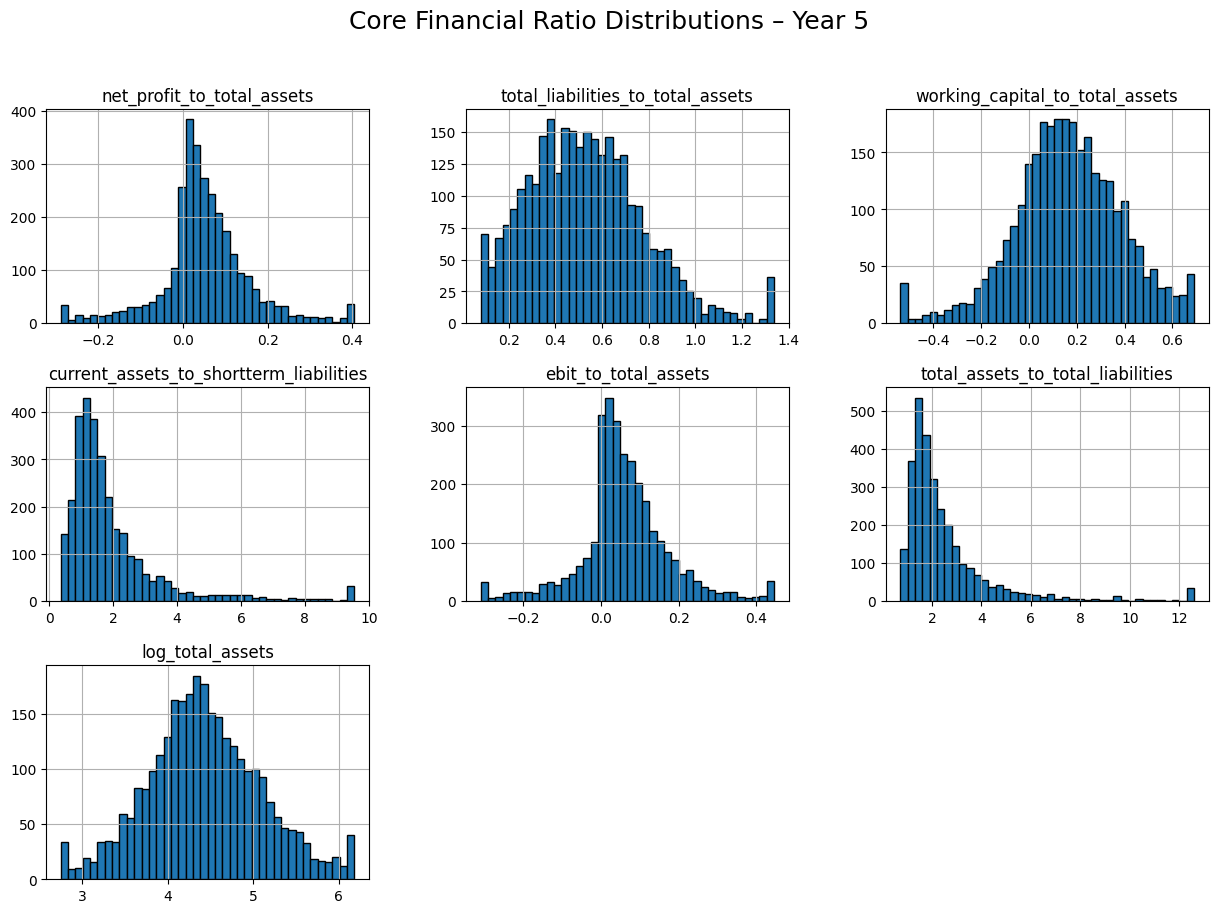

In [70]:
df5 = pd.read_csv("polish_bankruptcy_year5_winsorized.csv")  # load your file

core_features = [
    "net_profit_to_total_assets",
    "total_liabilities_to_total_assets",
    "working_capital_to_total_assets",
    "current_assets_to_shortterm_liabilities",
    "ebit_to_total_assets",
    "total_assets_to_total_liabilities",
    "log_total_assets"
]

df5[core_features].hist(bins=40, figsize=(15,10), edgecolor='black')
plt.suptitle("Core Financial Ratio Distributions – Year 5", fontsize=18)
plt.show()


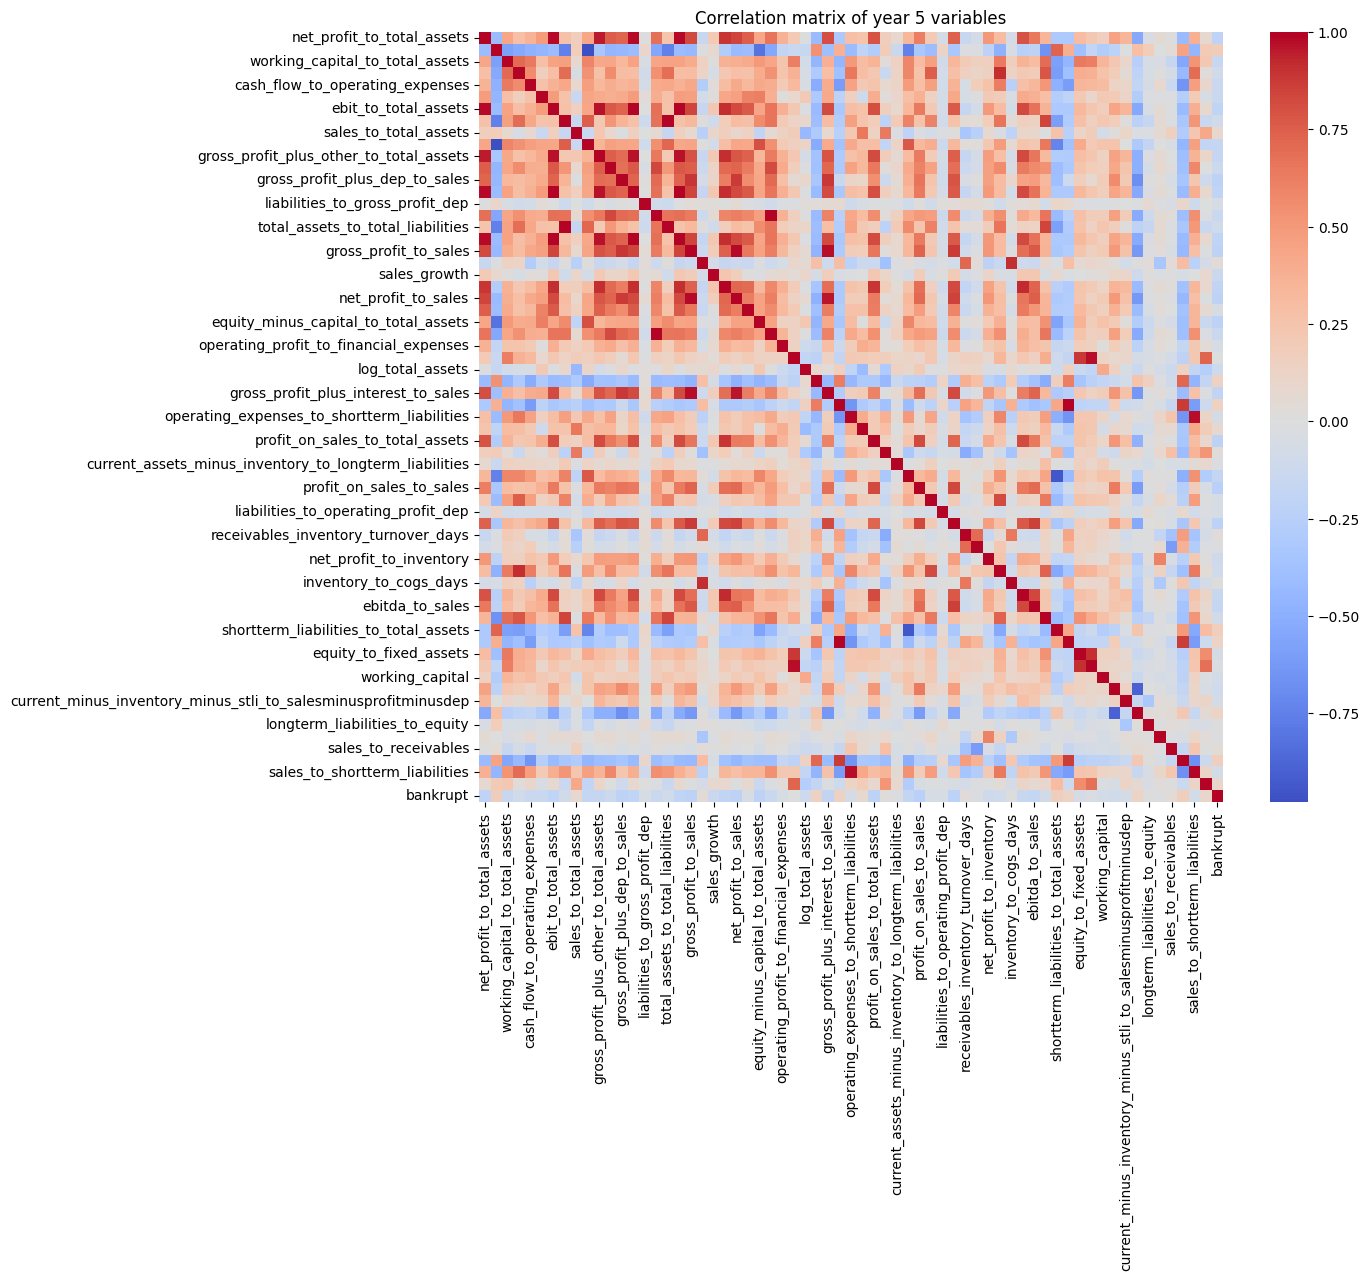

In [ ]:
# Compute correlation matrix
correlation = df5.corr()

# Plot
# Documentation
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

plt.figure(figsize = (12,10))
sns.heatmap(correlation, cmap ="coolwarm", center= 0)
plt.title("Correlation matrix of year 5 variables")
plt.show()

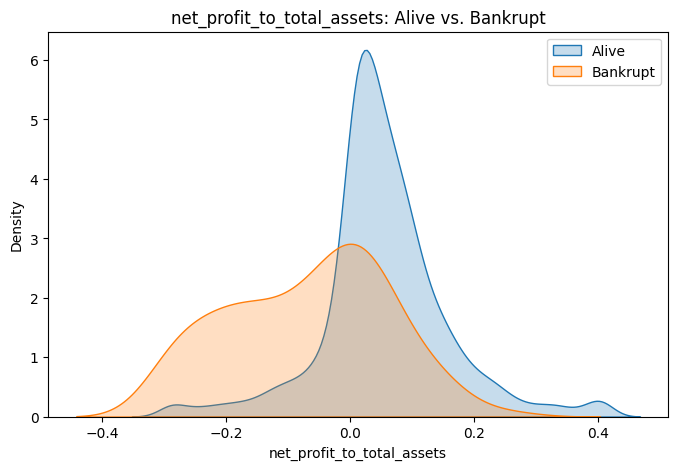

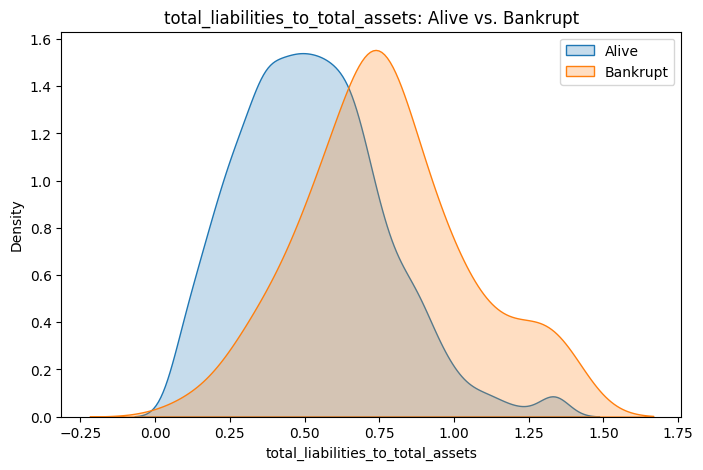

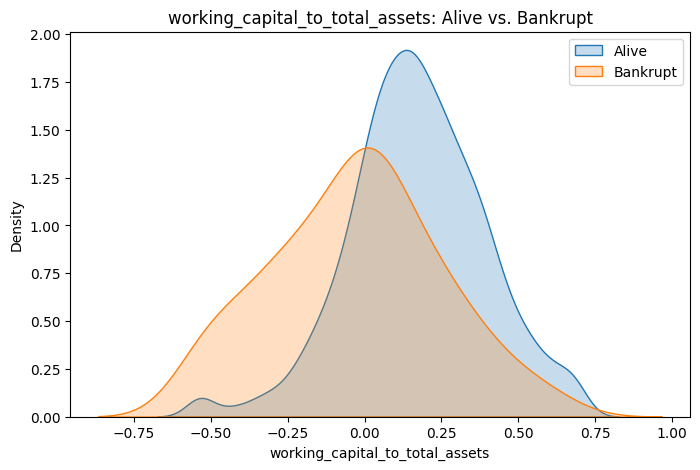

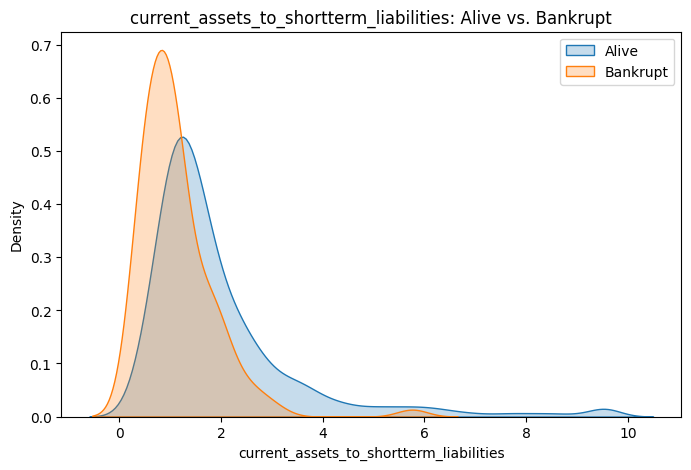

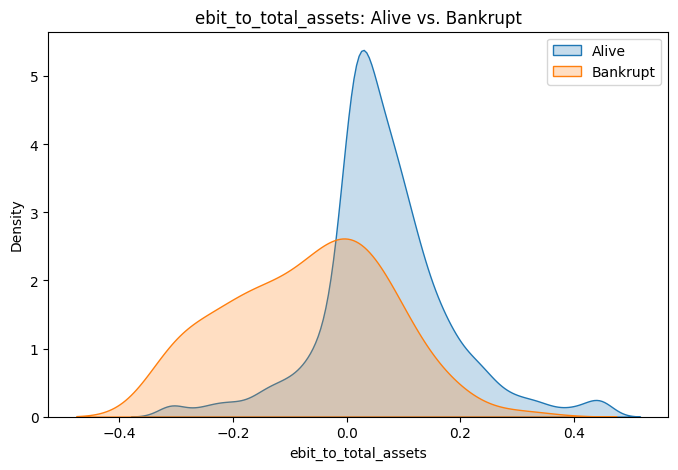

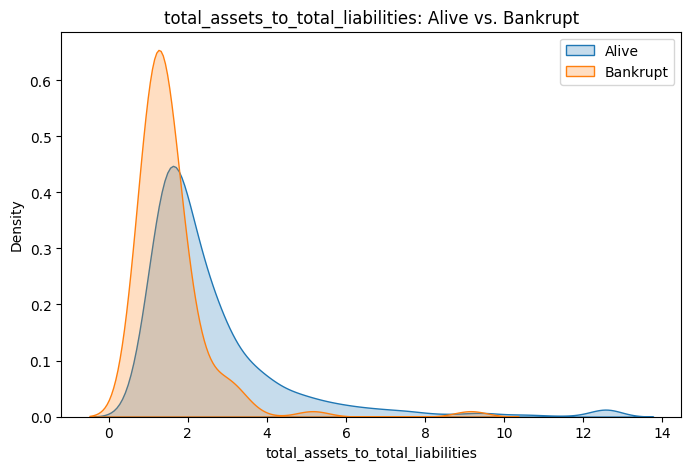

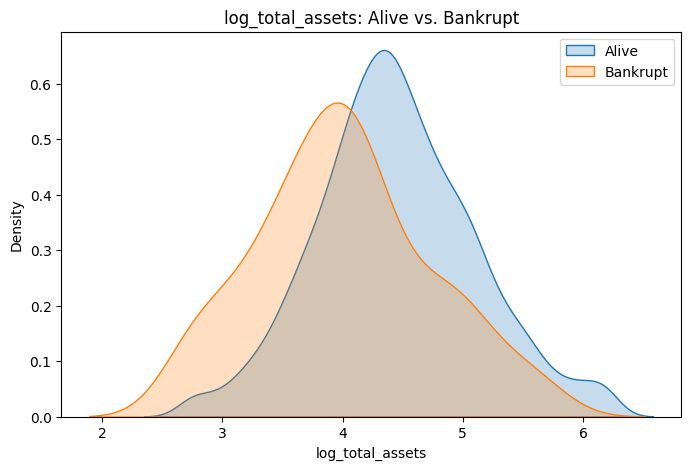

In [90]:
# documentation
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

for feature in core_features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(df5[df5["bankrupt"] == 0][feature], label="Alive", fill = 'fill') 
    sns.kdeplot(df5[df5["bankrupt"] == 1][feature], label="Bankrupt", fill='fill')
    plt.title(f"{feature}: Alive vs. Bankrupt")
    plt.legend()
    plt.show()